**Name**: Vedant Puranik

**Roll No.**: 43152

**Lab**: CL7

**Batch**: R9

**Assignment 10**: Neural Network Implementation and Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from google.colab import files
import io
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = files.upload()

Saving data.csv to data.csv


In [3]:
df = pd.read_csv(io.BytesIO(data['data.csv']))
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.drop(columns=['Unnamed: 32','id'],inplace=True)

In [6]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
df.shape

(569, 31)

In [8]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

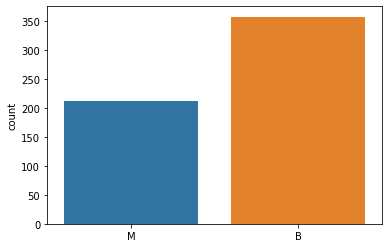

In [9]:
sns.countplot(df.diagnosis.values,label='count')

In [10]:
encode_diagnosis = {'diagnosis':{'B':0,'M':1}}

In [11]:
df.replace(encode_diagnosis,inplace=True)

In [12]:
df = df[[c for c in df if c not in ['diagnosis']] + ['diagnosis']]

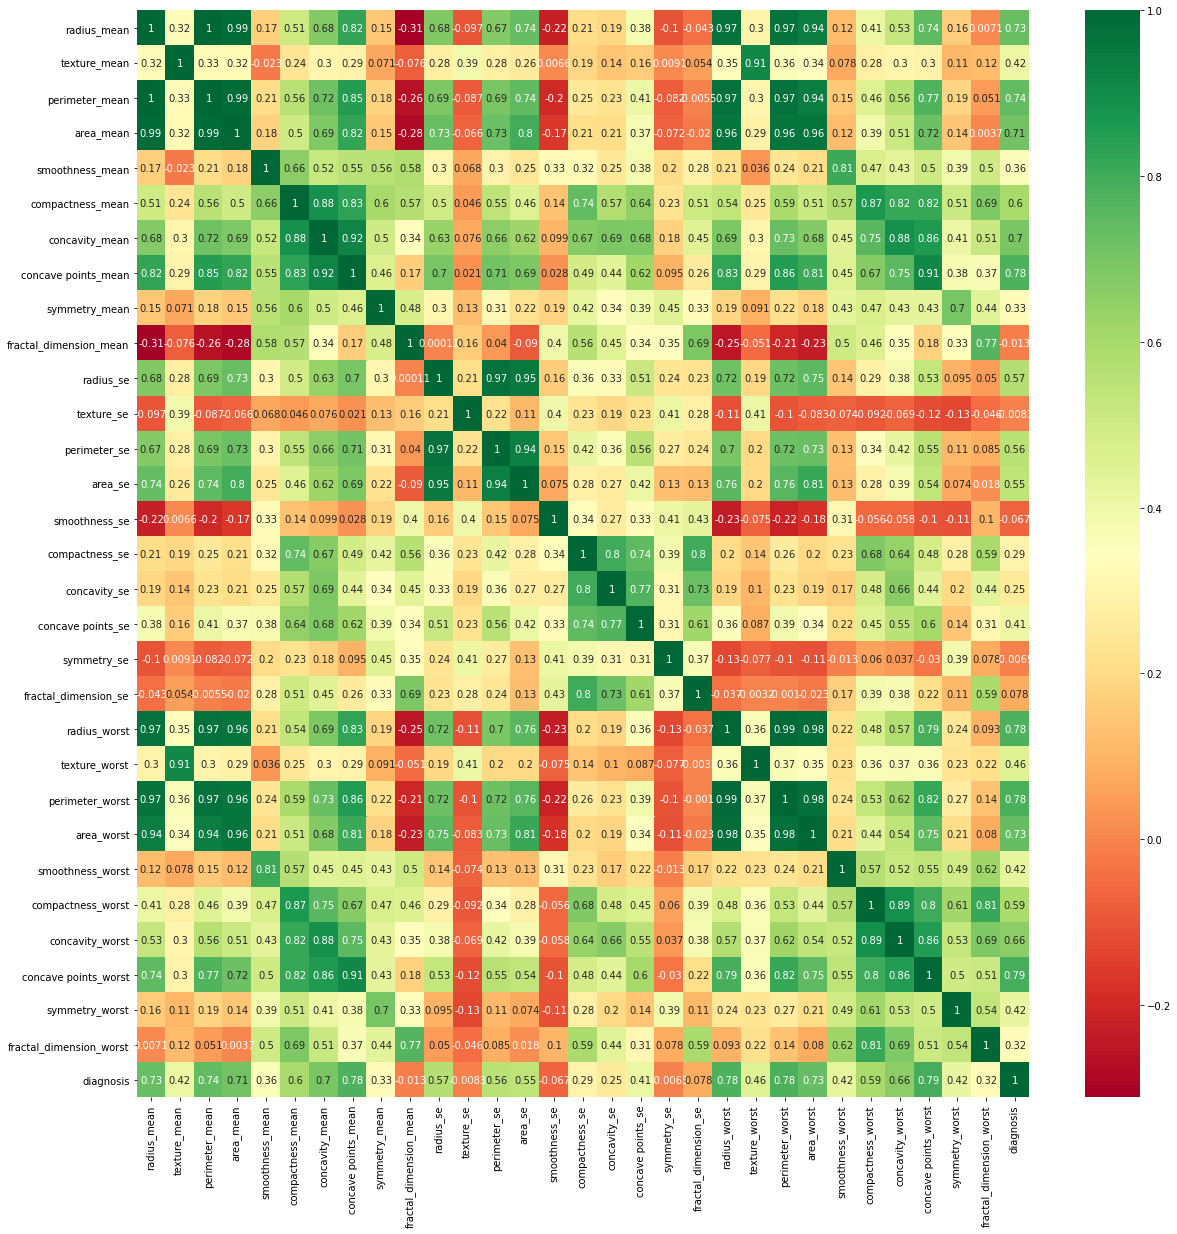

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

Features highly correlated with diagnosis:

radius_mean, permiter_mean, area_mean, compactness_mean, concavity mean, concave_points_mean, radius_worst, perimeter_worst, area_worst, concavity_worst, concave_points_worst

In [14]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [15]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [17]:
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']
print(featureScores.nlargest(20,'Score'))

                Features          Score
23            area_worst  112598.431564
3              area_mean   53991.655924
13               area_se    8758.504705
22       perimeter_worst    3665.035416
2         perimeter_mean    2011.102864
20          radius_worst     491.689157
0            radius_mean     266.104917
12          perimeter_se     250.571896
21         texture_worst     174.449400
1           texture_mean      93.897508
26       concavity_worst      39.516915
10             radius_se      34.675247
6         concavity_mean      19.712354
25     compactness_worst      19.314922
27  concave points_worst      13.485419
7    concave points_mean      10.544035
5       compactness_mean       5.403075
28        symmetry_worst       1.298861
16          concavity_se       1.044718
15        compactness_se       0.613785


**Without feature selection**

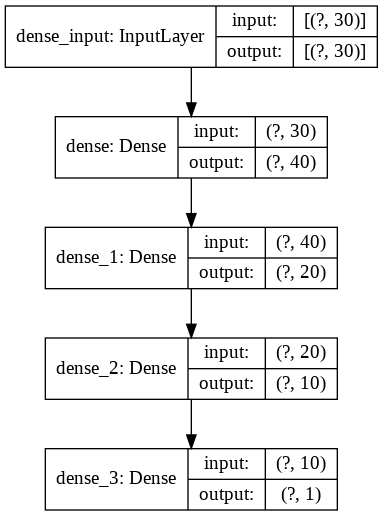

In [18]:
model = Sequential()
model.add(Dense(40,input_dim=30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
hist = model.fit(X,y,epochs=100,batch_size=10,validation_split=0.2)

Epoch 1/100
46/46 [==============================] - 0s 6ms/step - loss: 14.4858 - accuracy: 0.4440 - val_loss: 0.8348 - val_accuracy: 0.7895
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.8945 - val_loss: 0.2400 - val_accuracy: 0.9123
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1898 - accuracy: 0.9231 - val_loss: 0.1684 - val_accuracy: 0.9386
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.2910 - accuracy: 0.9077 - val_loss: 0.2298 - val_accuracy: 0.9035
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.2663 - accuracy: 0.9033 - val_loss: 0.2429 - val_accuracy: 0.9123
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.1935 - accuracy: 0.9165 - val_loss: 0.1852 - val_accuracy: 0.9211
Epoch 7/100
46/46 [==============================] - 0s 1ms/step - loss: 0.1883 - accuracy: 0.9407 - val_loss: 0.1913 - val_accuracy: 0.9474
Epoch 8/100


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                1240      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________


In [22]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

18/18 [==============================] - 0s 1ms/step - loss: 0.1516 - accuracy: 0.9402
Accuracy: 94.02


In [23]:
predictions = model.predict_classes(X)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [24]:
for i in range(0,10):
  print("{}. Prediction => {}, Actual => [{}]".format(i,predictions[i],y[i]))

0. Prediction => [1], Actual => [1]
1. Prediction => [1], Actual => [1]
2. Prediction => [1], Actual => [1]
3. Prediction => [1], Actual => [1]
4. Prediction => [1], Actual => [1]
5. Prediction => [1], Actual => [1]
6. Prediction => [1], Actual => [1]
7. Prediction => [1], Actual => [1]
8. Prediction => [1], Actual => [1]
9. Prediction => [1], Actual => [1]


In [25]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(100)

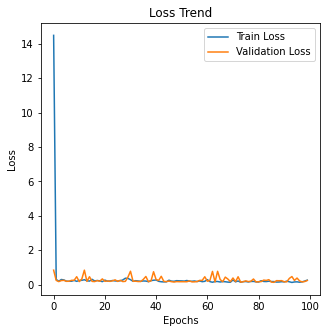

In [26]:
plt.figure(figsize=(5,5))
plt.plot(epochs,train_loss)
plt.plot(epochs,val_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Trend')
plt.legend(['Train Loss','Validation Loss'])
plt.show()

In [27]:
#save and load model
'''
model.save('cancer_model.h5')
from keras.models import load_model
model = load_model('cancer_model.h5')
'''

"\nmodel.save('cancer_model.h5')\nfrom keras.models import load_model\nmodel = load_model('cancer_model.h5')\n"

**With feature selection**

In [28]:
column_vals = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concave points_mean','radius_worst','perimeter_worst','area_worst','concavity_worst','concave points_worst']

In [29]:
X_reduced = X.loc[:,column_vals]

In [30]:
X_reduced

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,17.99,122.80,1001.0,0.27760,0.30010,0.14710,25.380,184.60,2019.0,0.7119,0.2654
1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,24.990,158.80,1956.0,0.2416,0.1860
2,19.69,130.00,1203.0,0.15990,0.19740,0.12790,23.570,152.50,1709.0,0.4504,0.2430
3,11.42,77.58,386.1,0.28390,0.24140,0.10520,14.910,98.87,567.7,0.6869,0.2575
4,20.29,135.10,1297.0,0.13280,0.19800,0.10430,22.540,152.20,1575.0,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11590,0.24390,0.13890,25.450,166.10,2027.0,0.4107,0.2216
565,20.13,131.20,1261.0,0.10340,0.14400,0.09791,23.690,155.00,1731.0,0.3215,0.1628
566,16.60,108.30,858.1,0.10230,0.09251,0.05302,18.980,126.70,1124.0,0.3403,0.1418
567,20.60,140.10,1265.0,0.27700,0.35140,0.15200,25.740,184.60,1821.0,0.9387,0.2650


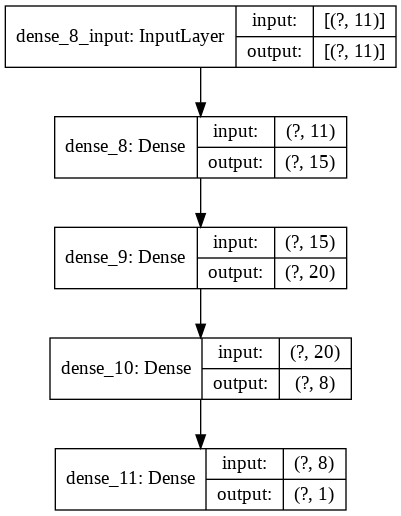

In [40]:
model_reduced = Sequential()
model_reduced.add(Dense(15,input_dim=11,activation='relu'))
model_reduced.add(Dense(20,activation='relu'))
model_reduced.add(Dense(8,activation='relu'))
model_reduced.add(Dense(1,activation='sigmoid'))
plot_model(model_reduced, to_file='model_reduced_plot.png', show_shapes=True, show_layer_names=True)

In [41]:
model_reduced.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [42]:
hist_reduced = model_reduced.fit(X_reduced,y,epochs=50,batch_size=5,validation_split=0.2)

Epoch 1/50
91/91 [==============================] - 0s 3ms/step - loss: 4.2763 - accuracy: 0.6835 - val_loss: 0.8865 - val_accuracy: 0.7193
Epoch 2/50
91/91 [==============================] - 0s 2ms/step - loss: 1.1371 - accuracy: 0.7473 - val_loss: 0.8637 - val_accuracy: 0.6754
Epoch 3/50
91/91 [==============================] - 0s 2ms/step - loss: 0.7086 - accuracy: 0.8462 - val_loss: 0.3298 - val_accuracy: 0.8860
Epoch 4/50
91/91 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.8308 - val_loss: 0.2880 - val_accuracy: 0.8947
Epoch 5/50
91/91 [==============================] - 0s 2ms/step - loss: 0.3631 - accuracy: 0.8923 - val_loss: 1.5113 - val_accuracy: 0.5789
Epoch 6/50
91/91 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.8769 - val_loss: 0.2268 - val_accuracy: 0.9298
Epoch 7/50
91/91 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8923 - val_loss: 0.2587 - val_accuracy: 0.9474
Epoch 8/50
91/91 [==

In [43]:
model_reduced.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 15)                180       
_________________________________________________________________
dense_9 (Dense)              (None, 20)                320       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 168       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 677
Trainable params: 677
Non-trainable params: 0
_________________________________________________________________


In [44]:
_, accuracy_ = model_reduced.evaluate(X_reduced, y)
print('Accuracy: %.2f' % (accuracy_*100))

18/18 [==============================] - 0s 1ms/step - loss: 0.2347 - accuracy: 0.9227
Accuracy: 92.27


In [45]:
preds = model_reduced.predict_classes(X_reduced)

In [46]:
for i in range(0,10):
  print("{}. Prediction => {}, Actual => [{}]".format(i,preds[i],y[i]))

0. Prediction => [1], Actual => [1]
1. Prediction => [1], Actual => [1]
2. Prediction => [1], Actual => [1]
3. Prediction => [0], Actual => [1]
4. Prediction => [1], Actual => [1]
5. Prediction => [1], Actual => [1]
6. Prediction => [1], Actual => [1]
7. Prediction => [1], Actual => [1]
8. Prediction => [0], Actual => [1]
9. Prediction => [1], Actual => [1]


In [51]:
train_loss = hist_reduced.history['loss']
val_loss = hist_reduced.history['val_loss']
train_acc = hist_reduced.history['accuracy']
val_acc = hist_reduced.history['val_accuracy']
epochs = range(50)

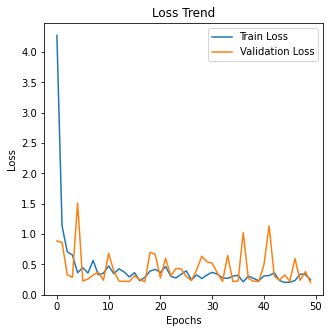

In [52]:
plt.figure(figsize=(5,5))
plt.plot(epochs,train_loss)
plt.plot(epochs,val_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Trend')
plt.legend(['Train Loss','Validation Loss'])
plt.show()